In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataloader import CamusDataset

dataset = CamusDataset(file_path='data/camus_training.hdf5', leave_out_patients=25)

Display the underlying lookup table.

In [2]:
dataset.df.head(15)

,patient,id,view,ED/ES,frame_no
0,patient0026,26,2CH,ED,1.0
1,patient0026,26,2CH,ES,17.0
2,patient0026,26,4CH,ED,1.0
3,patient0026,26,4CH,ES,17.0
4,patient0027,27,2CH,ED,1.0
5,patient0027,27,2CH,ES,22.0
6,patient0027,27,4CH,ED,1.0
7,patient0027,27,4CH,ES,19.0
8,patient0028,28,2CH,ED,1.0
9,patient0028,28,2CH,ES,19.0


We left out the first 25 patients, so they won't be present in the table:

In [3]:
dataset.df[dataset.df['id']<25]

,patient,id,view,ED/ES,frame_no


Let's retrieve a few random samples. The dataloader returns
1. The image
2. The mask
3. A tuple, containing:
    - The patient ID
    - The view
    - The frame (whether it's ED or ES)

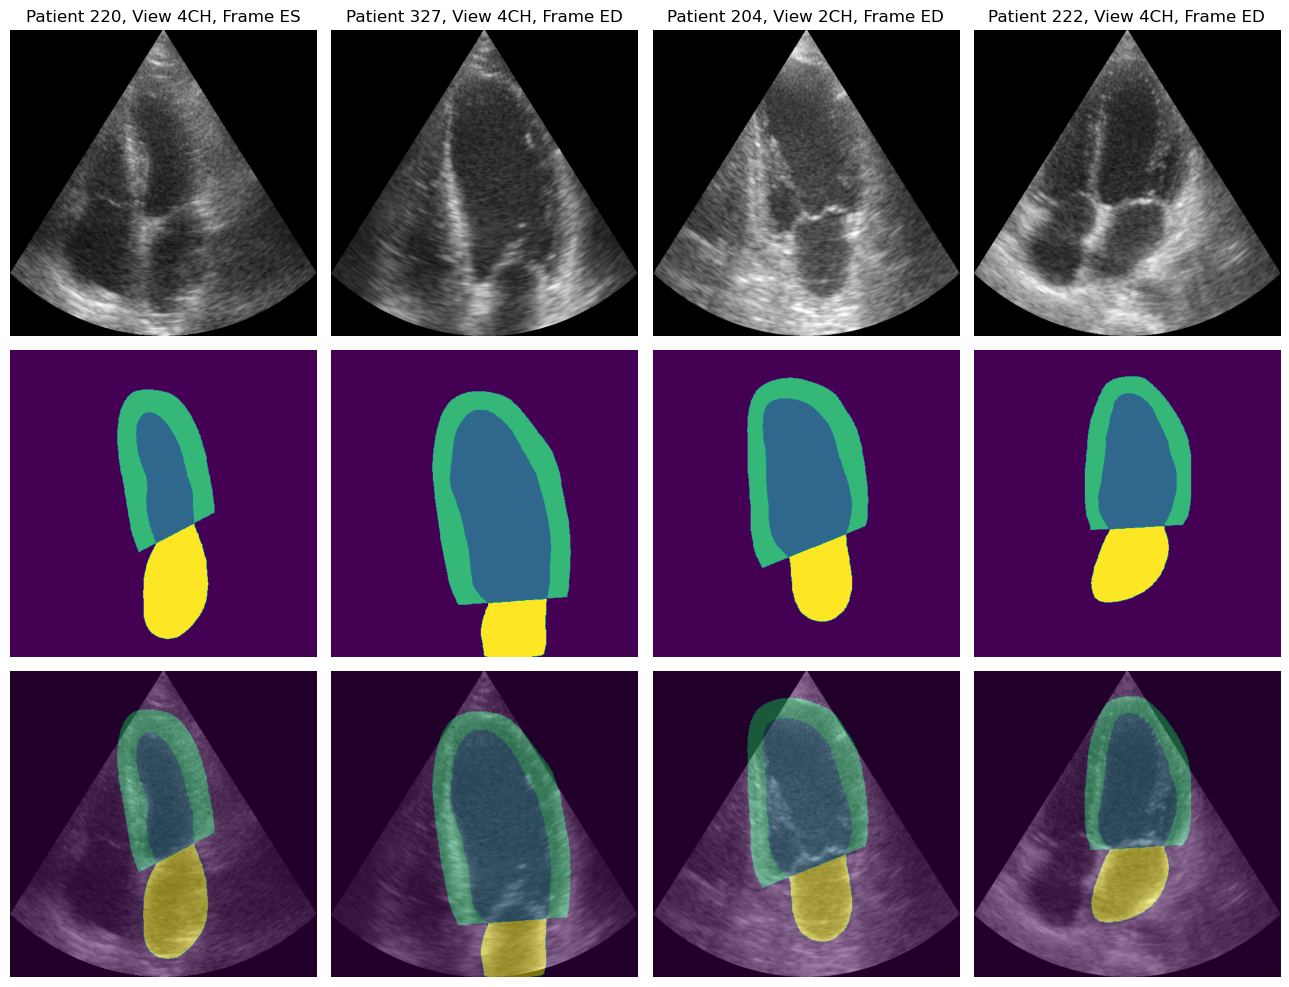

In [19]:
# Generate 4 random indices between 0 and len(dataset). Use them to retrieve 4 random images from the dataset. 

indices = np.random.randint(0, len(dataset), 4)

fig, axes = plt.subplots(3, 4, figsize=(13, 10))
for i in range(4):
    # Plot image
    axes[0,i].imshow(dataset[indices[i]][0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[0,i].set_title(f"Patient {dataset[indices[i]][2][0]}, View {dataset[indices[i]][2][1]}, Frame {dataset[indices[i]][2][2]}")
    # Plot mask
    axes[1,i].imshow(dataset[indices[i]][1].squeeze())
    # Plot image AND mask
    axes[2,i].imshow(dataset[indices[i]][0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[2,i].imshow(dataset[indices[i]][1].squeeze(), alpha=0.5)

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()